# Experiments of different players

In this notebook, we introduce some experiments using the different players with pre-established strategy so we can compare their performances in different scenarios.

Different strategies/player tested:

- *Random player:* plays a card randomly with a distribution independent of the game's information
- *Max card player:* always plays his maximum card whatever the deck's card
- *Min card player:* always plays his min card whatever the deck's card

- *Bonus craving player:* plays with high probability a high card to gain high bonuses, and plays randomly for the rest
- *Malus adverse player:* plays with high probability high cards for maluses, and plays randomly for the rest
- *GetRidOfBadCards player:* plays with high probability low cards on small maluses or bonuses and randomly for the rest

The baseline "dummy" player can be considered to be the *Random player*.

Objective of this notebook is to provide a comparison framework that can also be used later when implementing other strategies using Reinforcement Learning techniques.

For these experiments of predefined strategies we will fix the number of games as the players do not learn over time. We still chose a large number so that we can draw conclusions with the effect of randomness reduced.

Comparison parameters:
- number of games played: 5 000
- standard number of cards: 5 maluses and 10 bonuses
- output: 
    - number of games won for each player, windowing on the last 500 games
    - number of games won over time (equivalent to current reward)

Experiments list:

1. First experiment: For each player (6), we make it play against 1, 2 and 5 random players.
    - The first experiment shows that the BonusCravingPlayer outperforms significantly the RandomPlayer.
    - MaxPlayer and MinPlayer are somehow equivalent to RandomPlayer for this experiment.
    - While MalusAdverse and GetRidOfBadCards seem to be unefficient against random players.
2. Second experiments: Reproduce the first experiment for a different number of cards: (2 maluses with 4 bonuses and 10 maluses with 20 bonuses)
    - We observe the same conclusion as the first experiment when we change the number of bonus/malus cards
    - Given the results of these 2 experiments, one can suggest that the most realistic player is BonusCravingPlayer
3. Third experiment: For each player (6), we make it play against 1, 2 and 5 BonusCravingPlayers.

In [ ]:
from tqdm import tqdm
import json
import matplotlib.pyplot as plt

from game import Game
from player import RandomPlayer, MaxPlayer, MinPlayer, BonusCravingPlayer, MalusAdverse, GetRidOfBadCards

from analyse import read_game, plot_win_over_time

In [ ]:
def experiment_solo(player_class, opponent_class=RandomPlayer, n_game=5000, n_cards=5):
    n_player_list = [2,3,6]
    for n_player in n_player_list:
        game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=False)
        game.player_list_[0] = player_class("Guinea Pig", n_cards)
        for i in range(1, n_player):
            game.player_list_[i] = opponent_class(i, n_cards)
        game_summary_list = []
        winner_list_list = []
        for _ in tqdm(range(n_game)):
            player_list, game_summary, winner_list = game.play()
            game_summary_list.append(game_summary)
            winner_list_list.append(list(map(str, winner_list)))
        with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_experiments_{opponent_class.__name__}_{player_class.__name__}.json", "w+") as f:
            json.dump(
                {
                    "player_list": list(map(str, player_list)),
                    "game_summary_list": game_summary_list,
                    "winner_list_list": winner_list_list,
                },
                f,
                indent=4,
            )

In [ ]:
def experiment_solo_show(player_class, opponent_class=RandomPlayer, n_game=5000, n_cards=5):
    n_player_list = [2,3,6]
    for n_player in n_player_list:
        player_list, df_game = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_experiments_{opponent_class.__name__}_{player_class.__name__}.json", return_player=True)
        
        # Plotting the game wins
        fig, ax = plt.subplots()
        ax.set_title(f"Windowed game wins for {player_class.__name__} against {n_player-1} {opponent_class.__name__} player{'s' if n_player > 2 else ''}")
        df_win = plot_win_over_time(df_game, player_list=player_list, window=500, fig=fig, ax=ax)
        fig.show()

        #Plotting cumulative reward
        df_reward = df_win.drop(columns=["game_winner"]).astype(int)
        df_reward = df_reward - 1/df_reward.shape[1]
        print("Sum of rewards:", df_reward.sum().sum())
        column = df_reward.columns[df_reward.columns.str.contains("Guinea Pig")]
        fig, ax = plt.subplots()
        ax.set_title(f"Cumulative reward for {player_class.__name__} against {n_player-1} {opponent_class.__name__} player{'s' if n_player > 2 else ''}")
        df_reward.loc[:,column].cumsum().plot(ax=ax)
        fig.show()

In [ ]:
list_player_class = [RandomPlayer, MaxPlayer, MinPlayer, BonusCravingPlayer, MalusAdverse, GetRidOfBadCards]

In [ ]:
for player_class in list_player_class:
    experiment_solo(player_class)

100%|██████████| 5000/5000 [00:04<00:00, 1049.99it/s]


Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 4812
/work/StupideVautour/implementation/analyse.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["game_winner"] = df_clean["game_winner"].apply(lambda x: x[0])
Sum of rewards: 0.0
Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 4810
/work/StupideVautour/implementation/analyse.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["game_winner"] = df_c

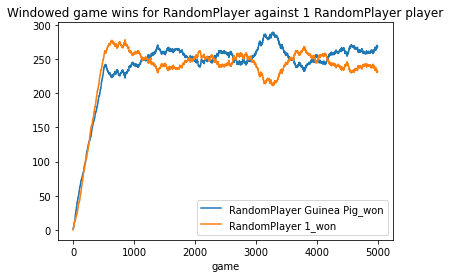

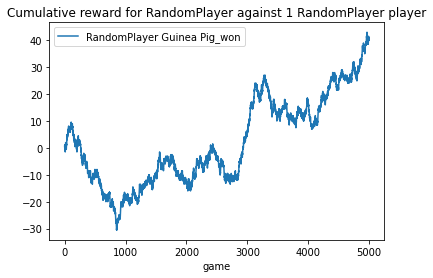

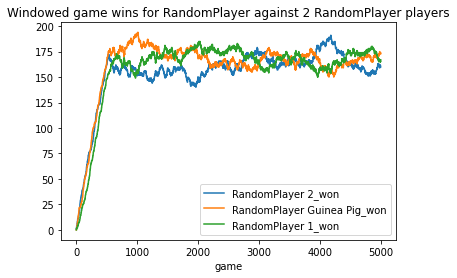

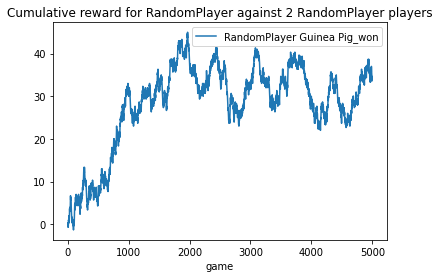

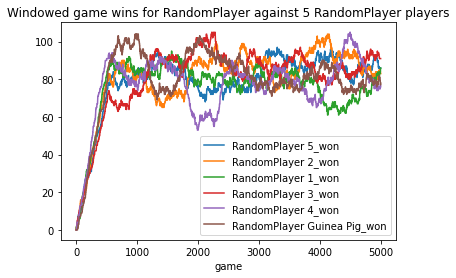

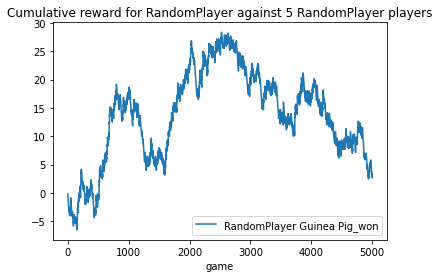

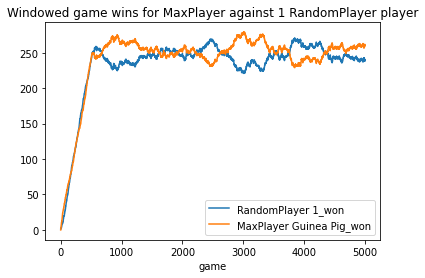

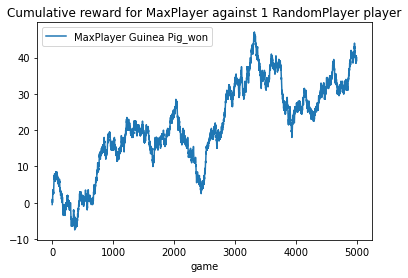

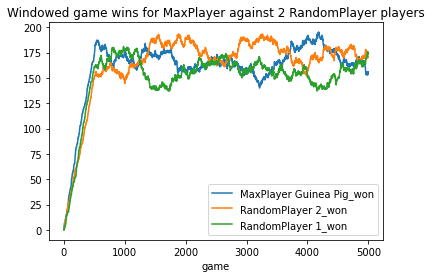

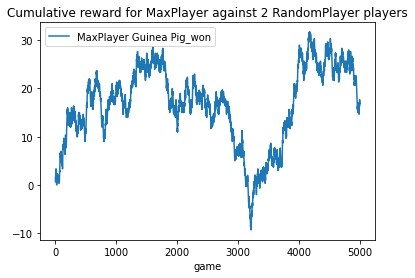

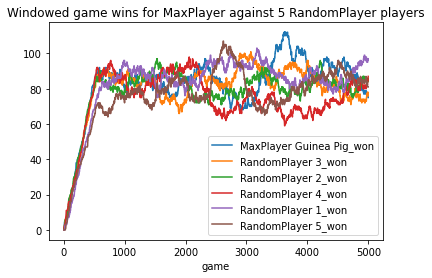

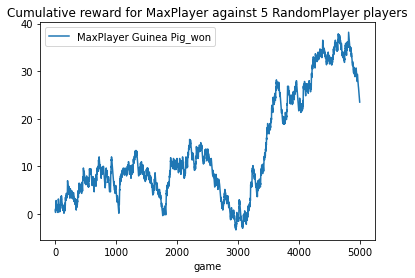

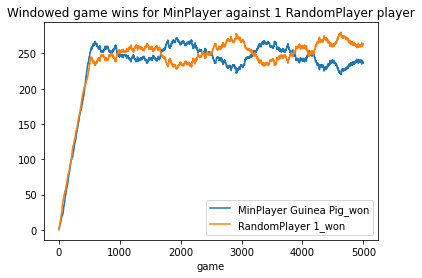

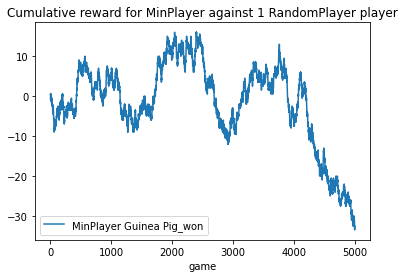

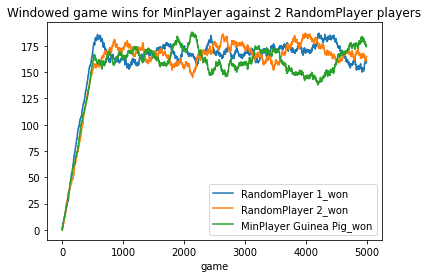

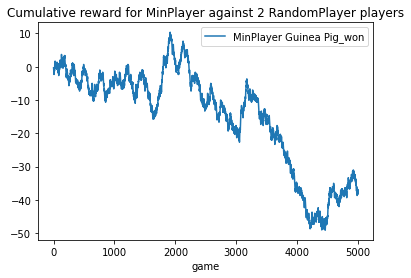

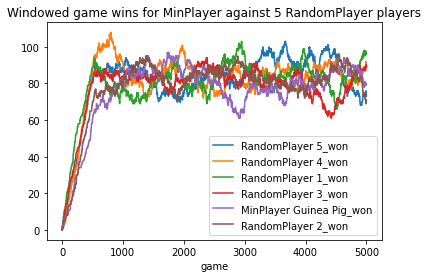

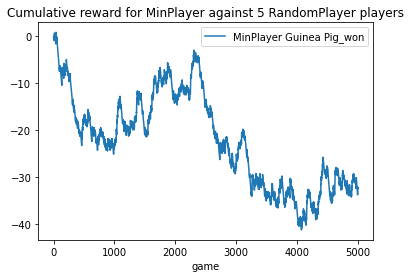

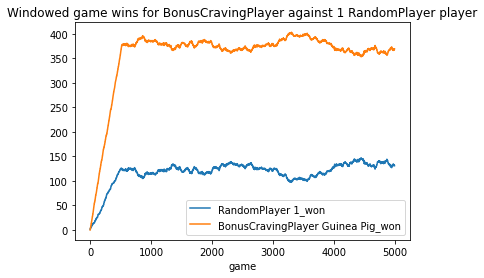

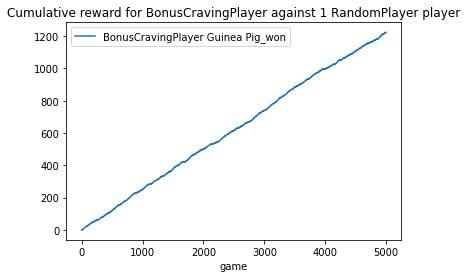

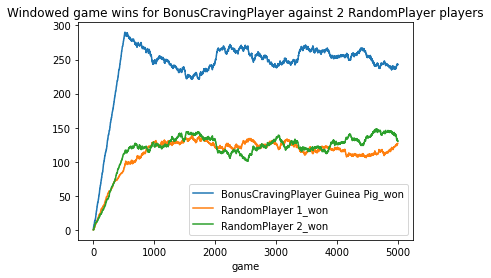

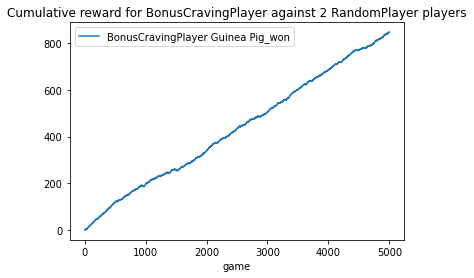

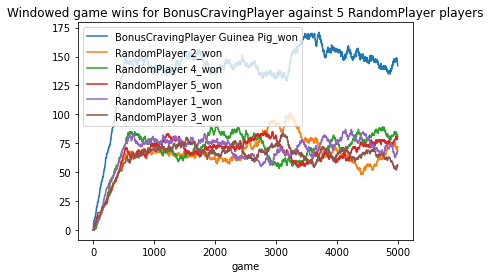

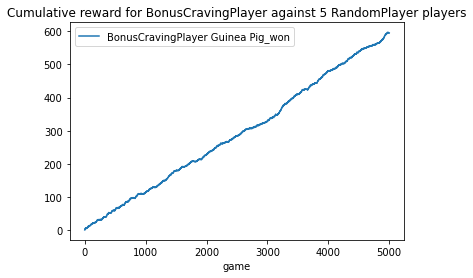

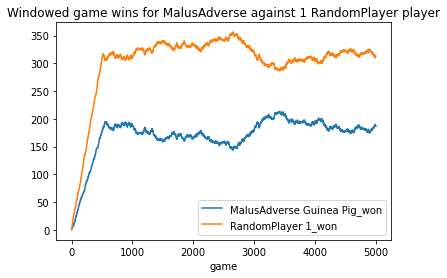

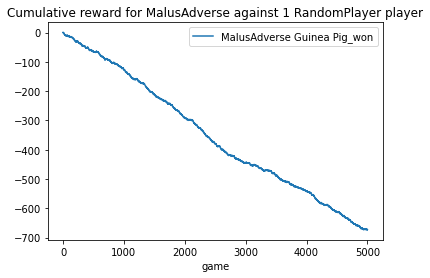

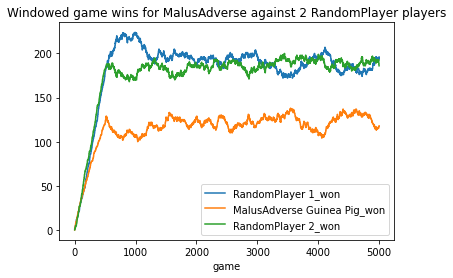

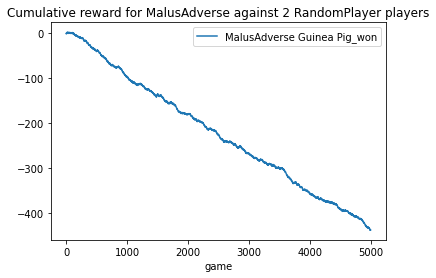

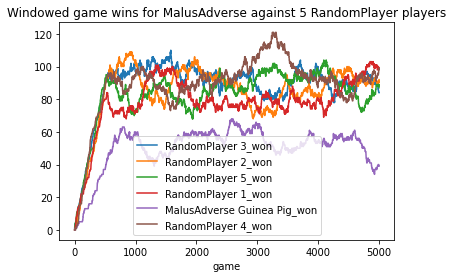

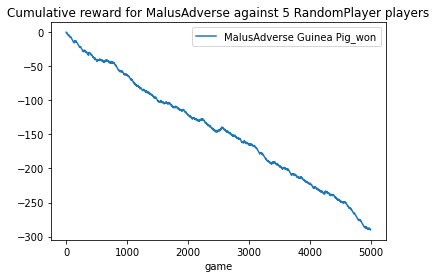

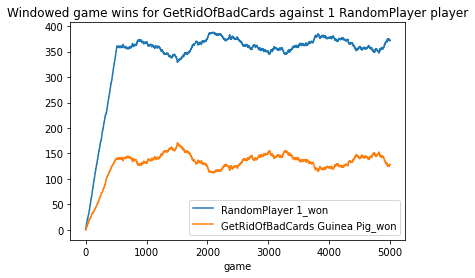

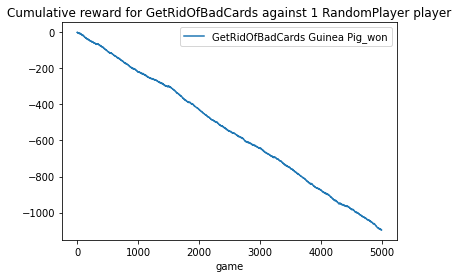

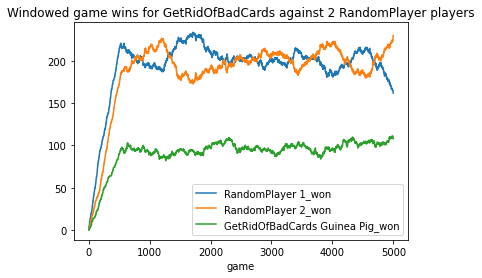

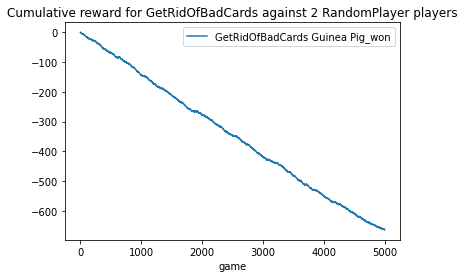

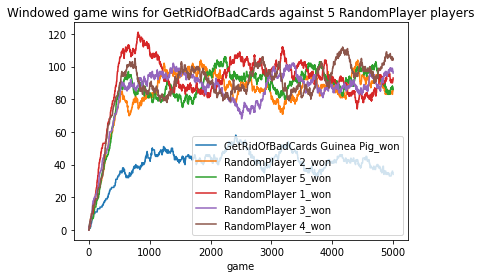

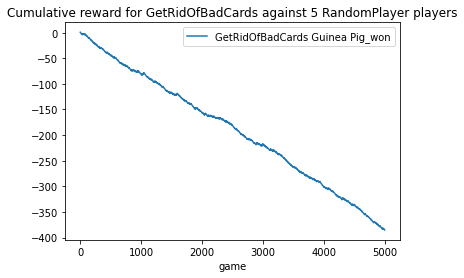

In [ ]:
for player_class in list_player_class:
    experiment_solo_show(player_class)

## Varying the number of cards

### 2 malus cards and 4 bonus cards

In [ ]:
for player_class in list_player_class:
    experiment_solo(player_class, n_cards=2)

100%|██████████| 5000/5000 [00:02<00:00, 1976.73it/s]


Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 4641
Sum of rewards: 0.0
/work/StupideVautour/implementation/analyse.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["game_winner"] = df_clean["game_winner"].apply(lambda x: x[0])
Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 4532
Sum of rewards: 6.323830348264892e-13
/work/StupideVautour/implementation/analyse.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

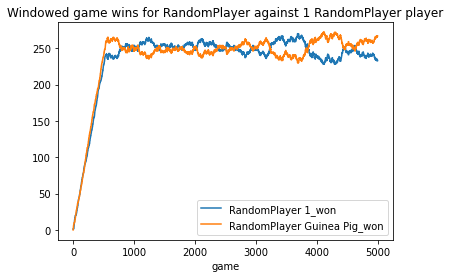

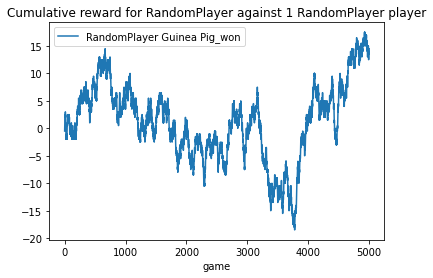

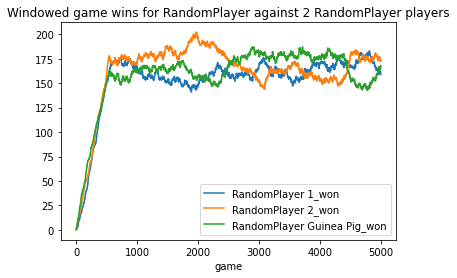

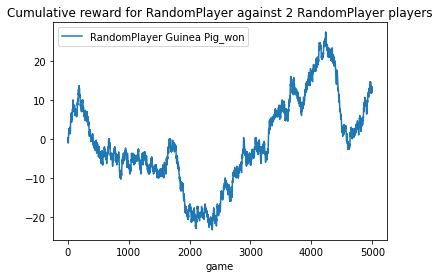

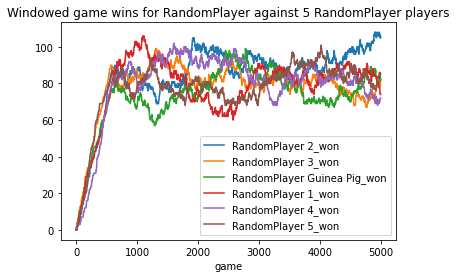

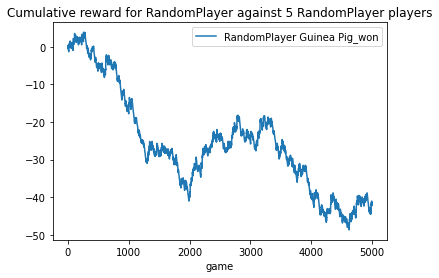

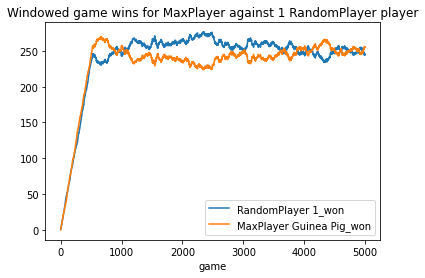

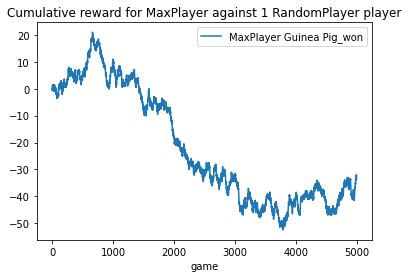

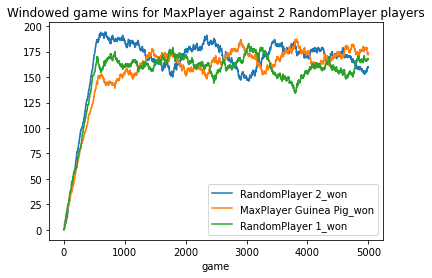

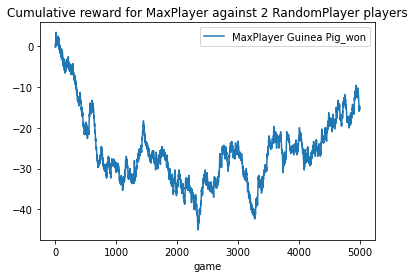

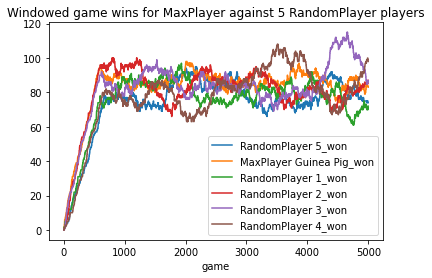

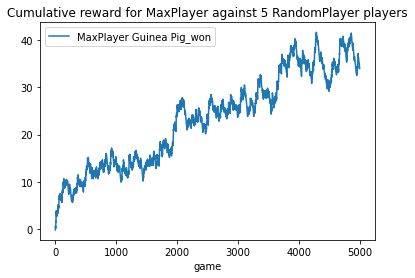

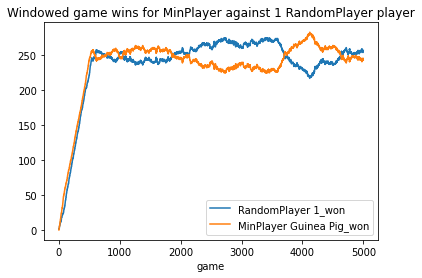

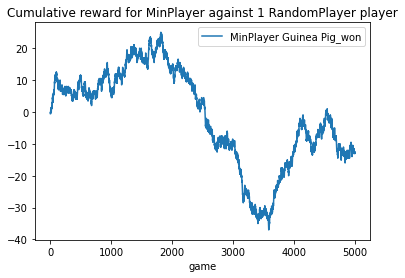

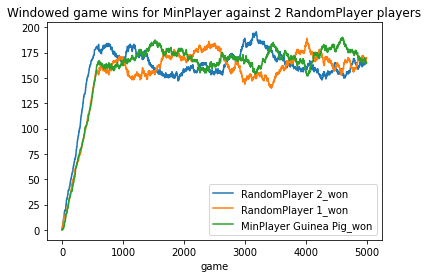

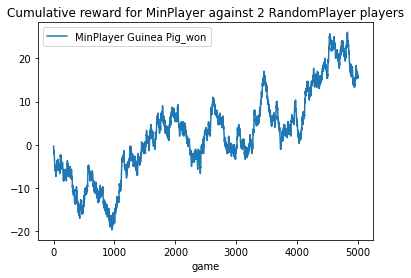

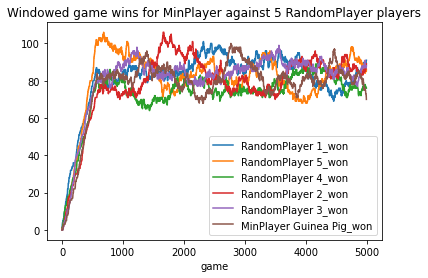

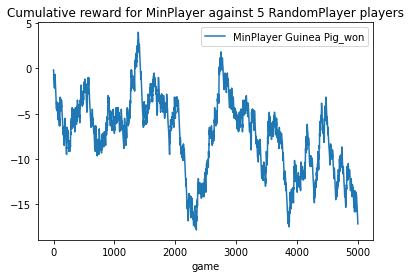

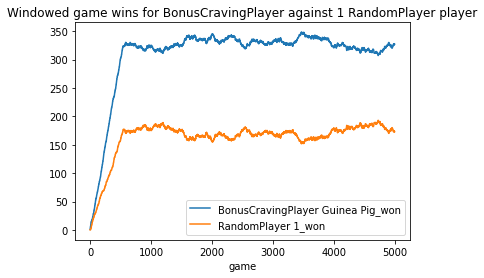

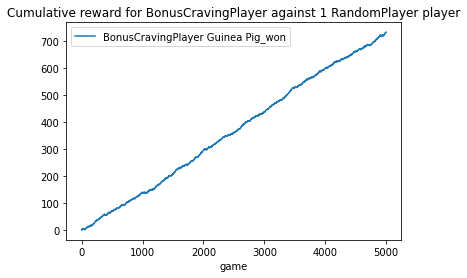

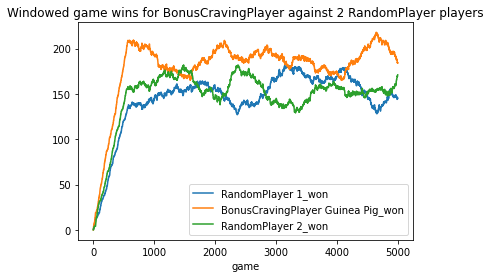

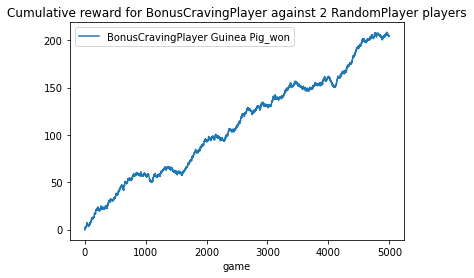

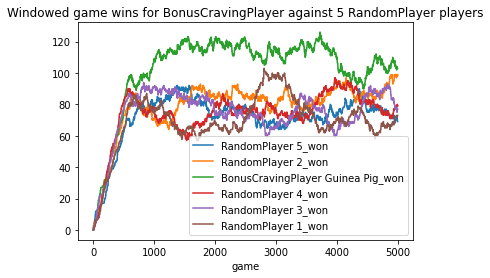

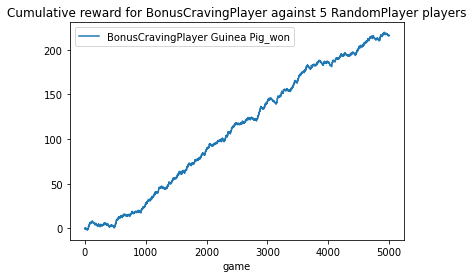

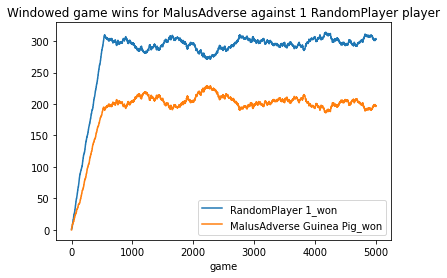

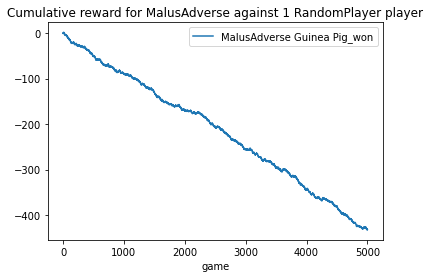

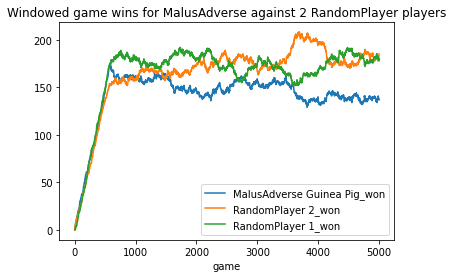

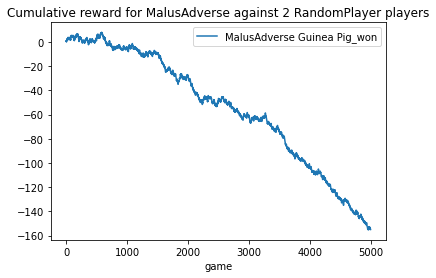

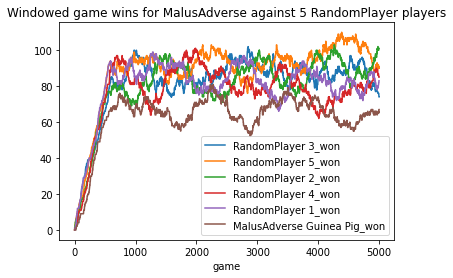

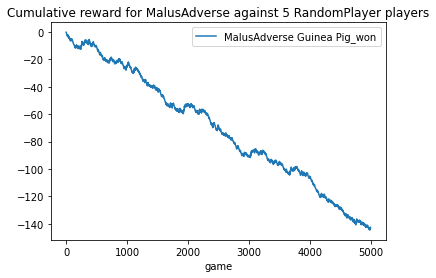

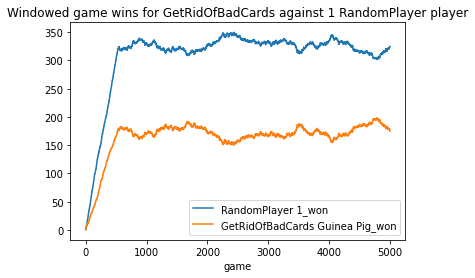

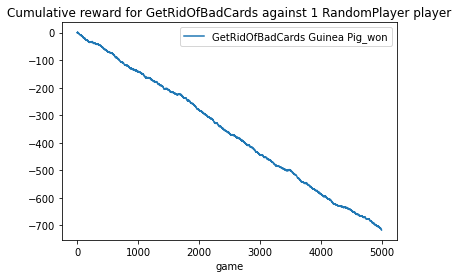

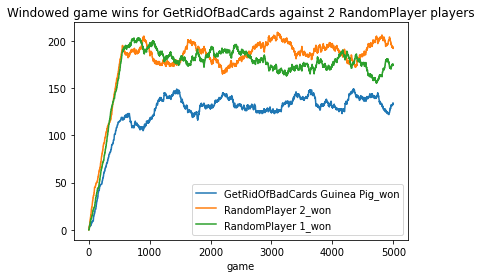

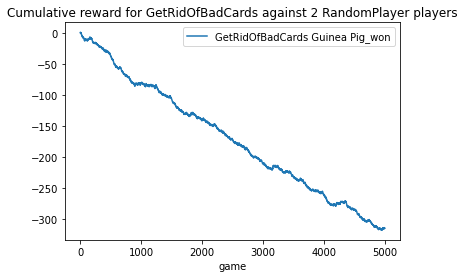

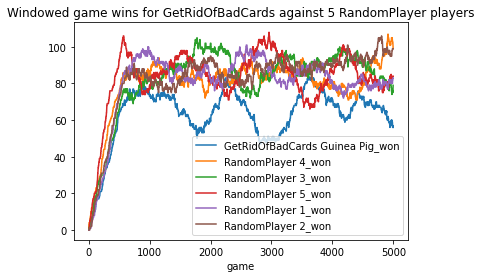

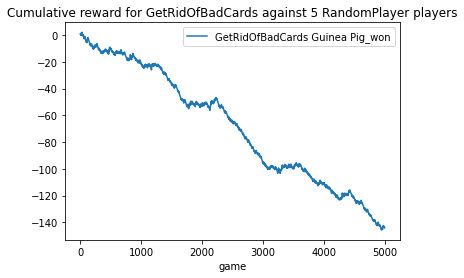

In [ ]:
for player_class in list_player_class:
    experiment_solo_show(player_class, n_cards=2)

### 10 malus cards and 20 bonus cards

In [ ]:
for player_class in list_player_class:
    experiment_solo(player_class, n_cards=10)

100%|██████████| 5000/5000 [00:08<00:00, 604.15it/s]


Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 4961
Sum of rewards: 0.0
/work/StupideVautour/implementation/analyse.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["game_winner"] = df_clean["game_winner"].apply(lambda x: x[0])
Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 4911
/work/StupideVautour/implementation/analyse.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["game_winner"] = df_c

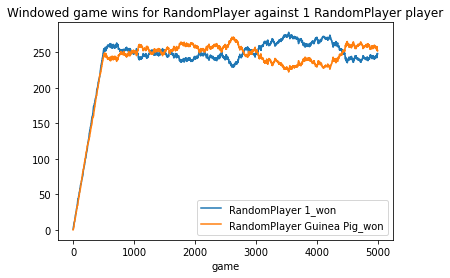

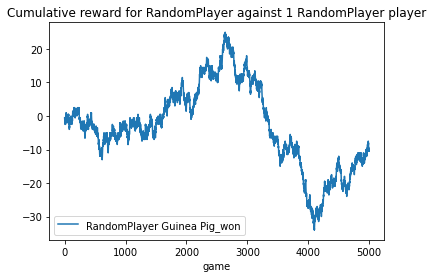

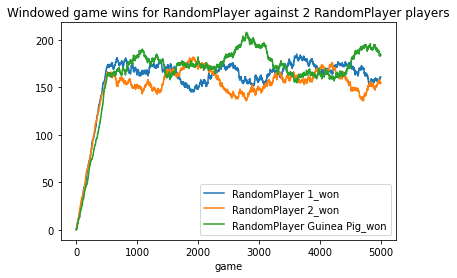

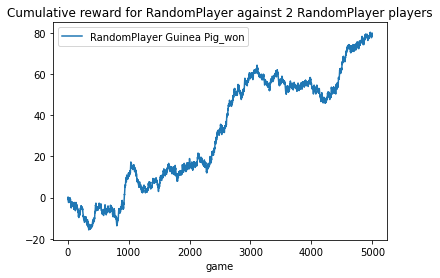

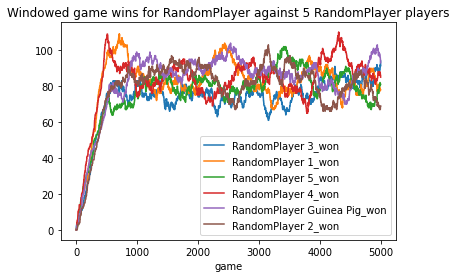

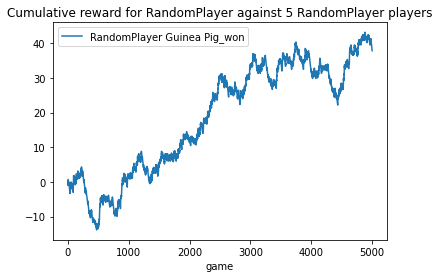

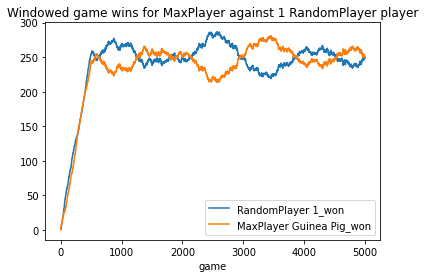

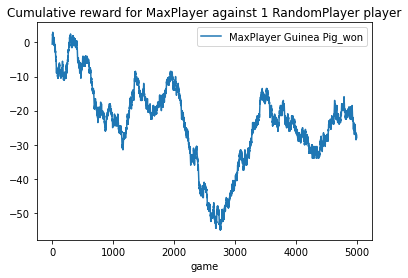

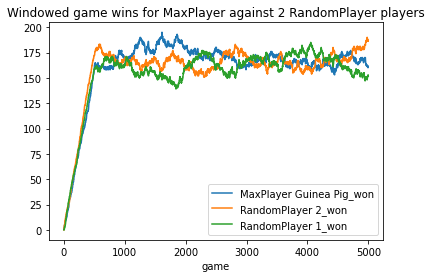

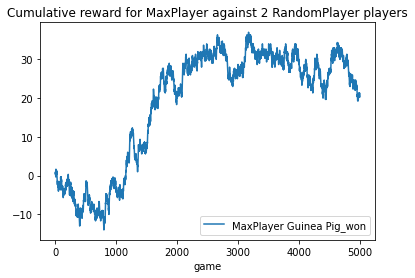

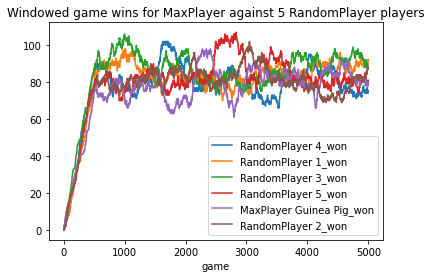

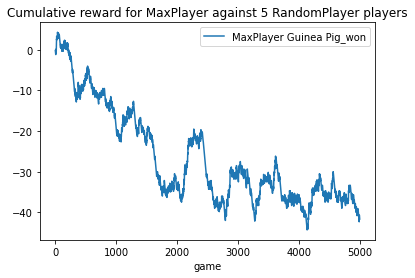

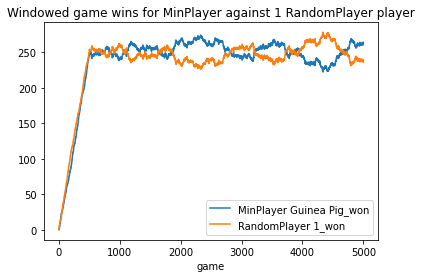

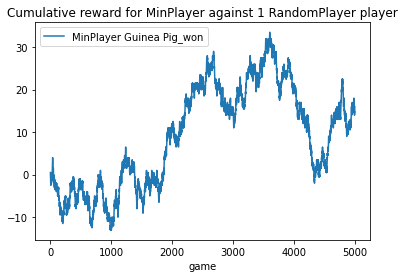

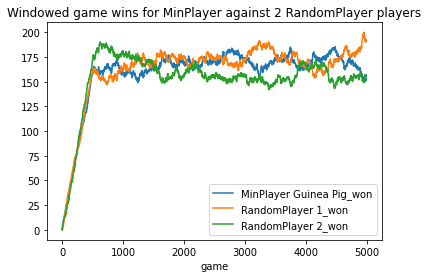

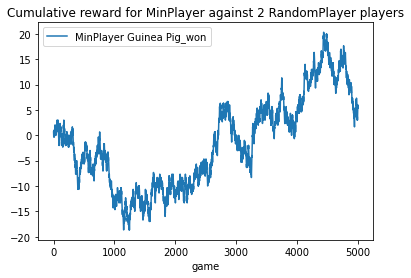

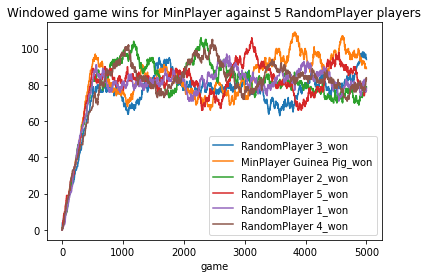

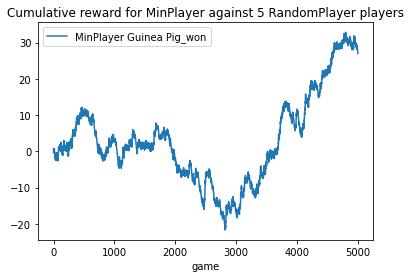

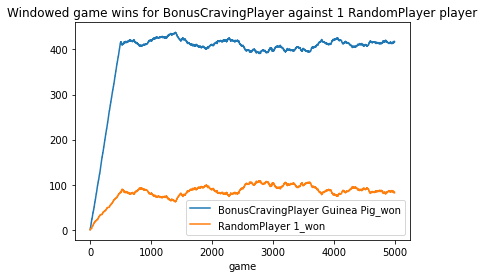

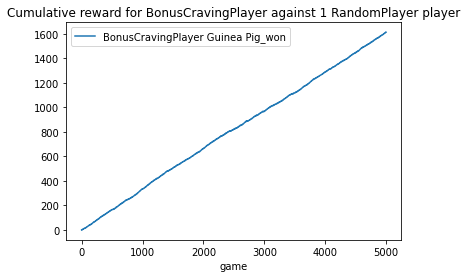

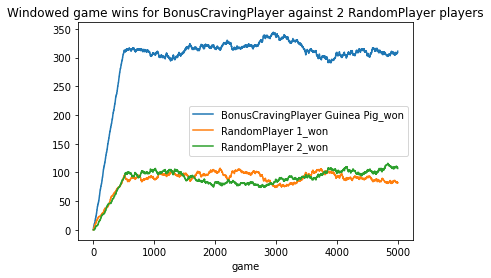

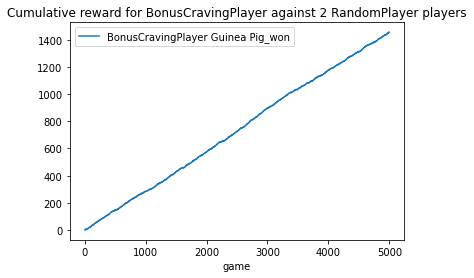

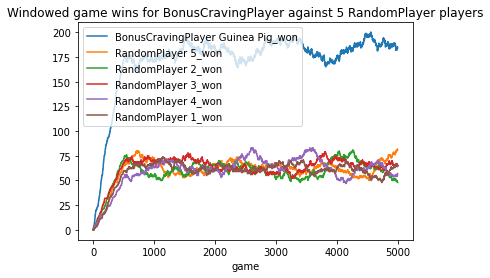

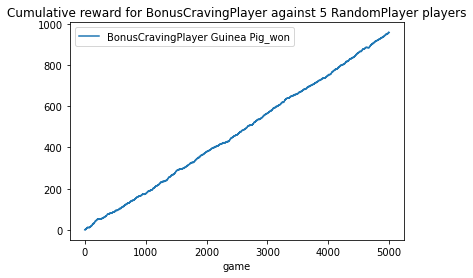

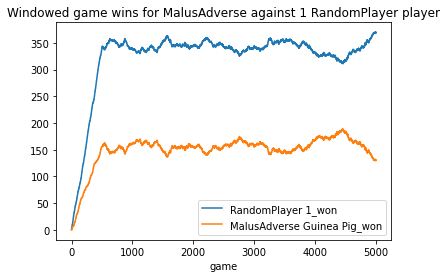

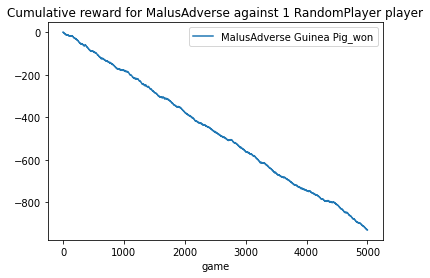

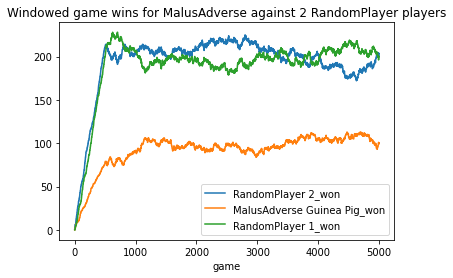

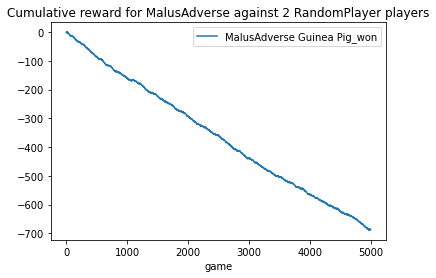

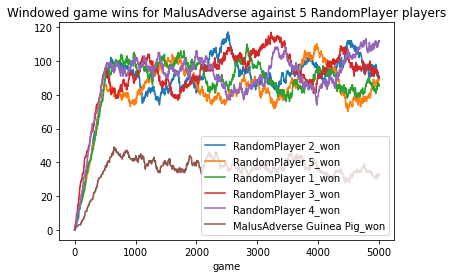

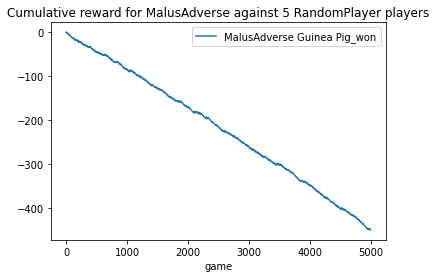

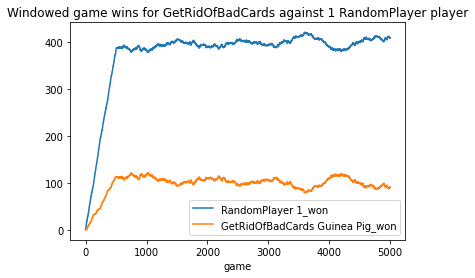

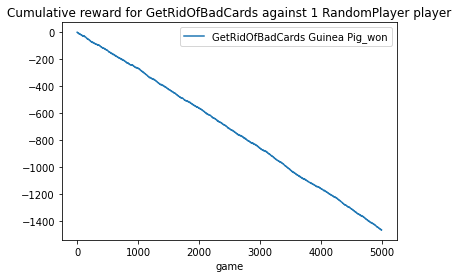

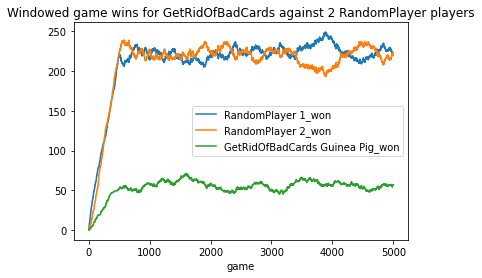

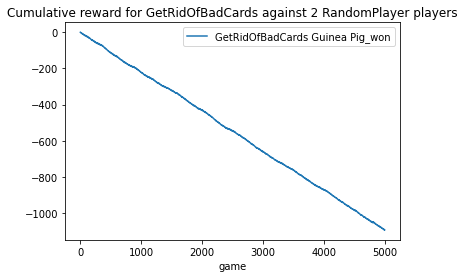

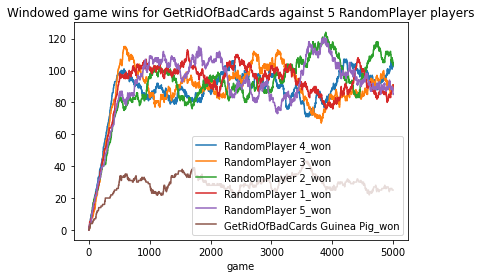

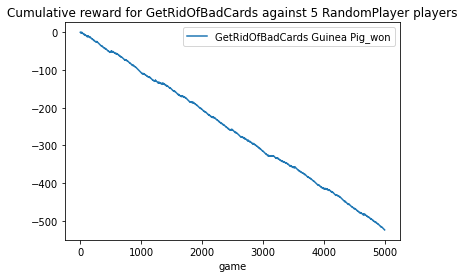

In [ ]:
for player_class in list_player_class:
    experiment_solo_show(player_class, n_cards=10)

## Experiment 3: Against BonusCravingPlayers

In [ ]:
for player_class in list_player_class:
    experiment_solo(player_class, opponent_class=BonusCravingPlayer)

100%|██████████| 5000/5000 [00:03<00:00, 1285.85it/s]


Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 4859
Sum of rewards: 0.0
/work/StupideVautour/implementation/analyse.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["game_winner"] = df_clean["game_winner"].apply(lambda x: x[0])
Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 4827
Sum of rewards: 6.608047442568932e-13
/work/StupideVautour/implementation/analyse.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

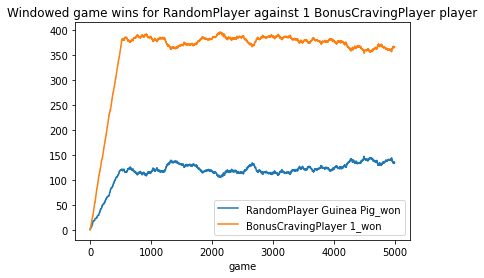

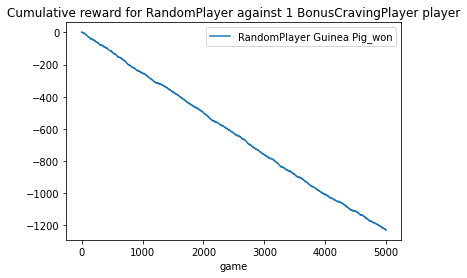

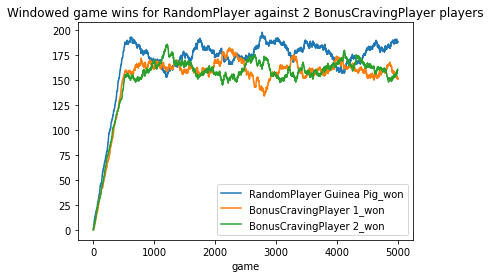

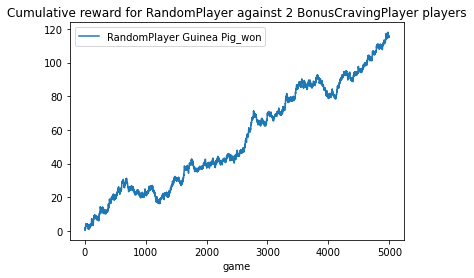

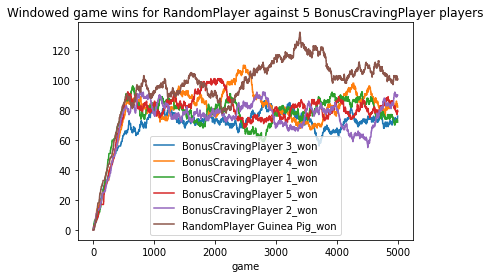

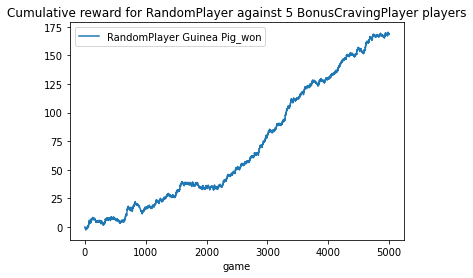

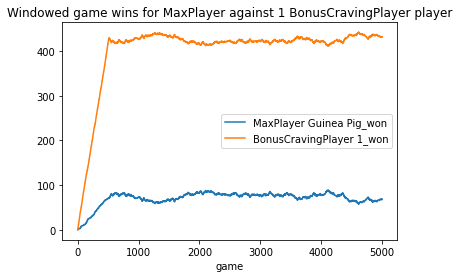

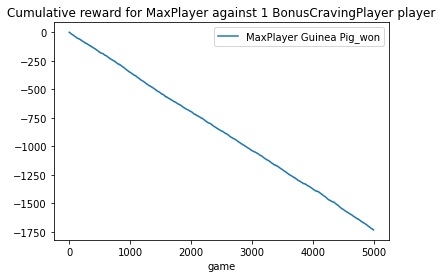

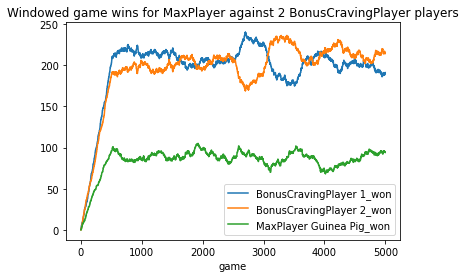

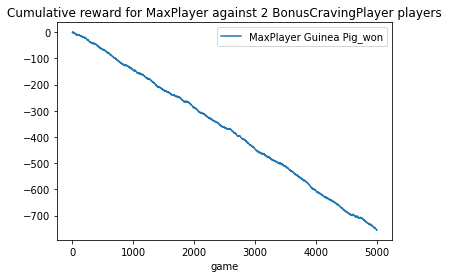

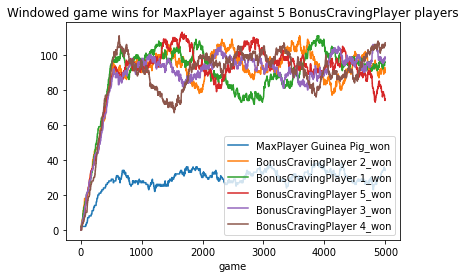

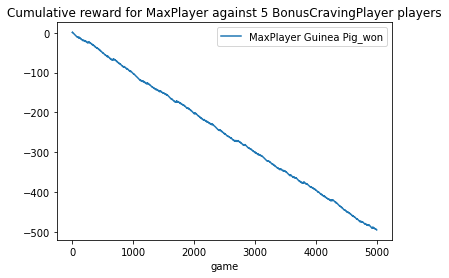

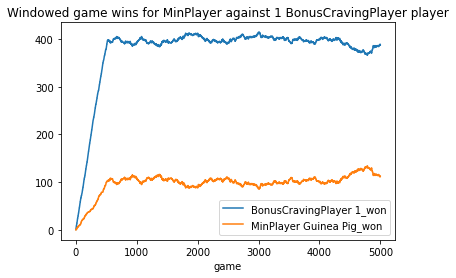

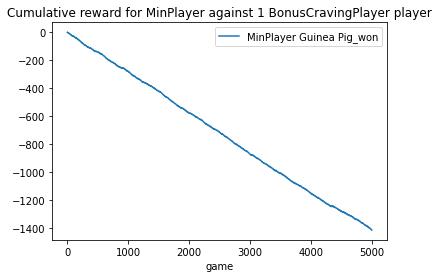

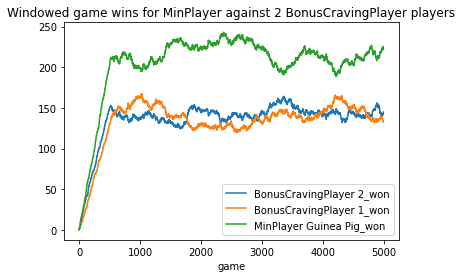

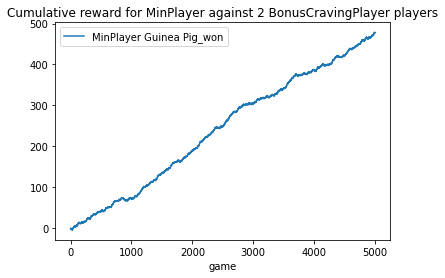

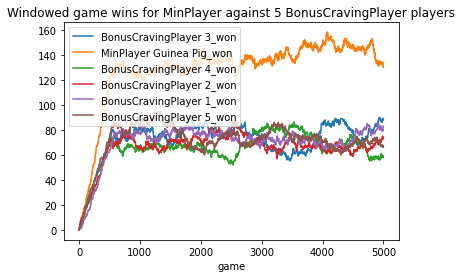

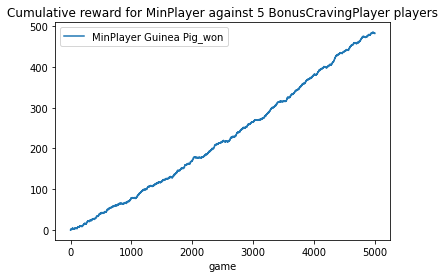

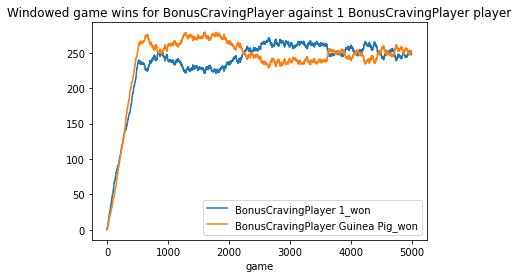

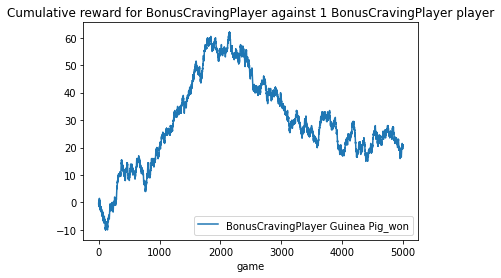

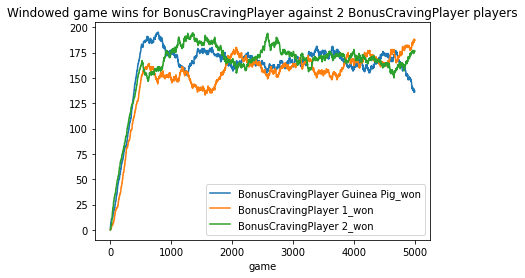

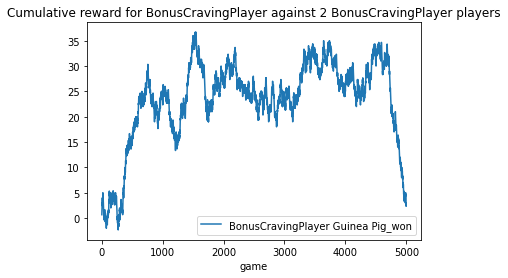

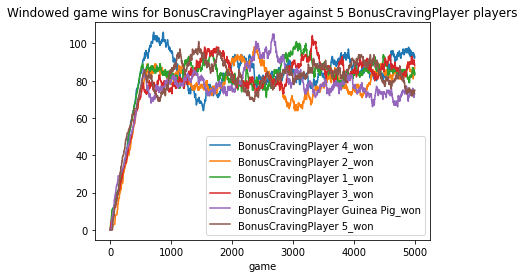

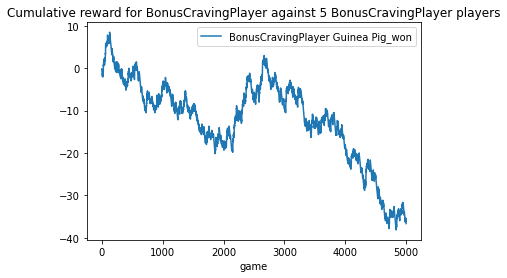

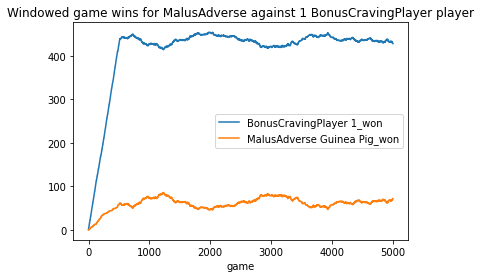

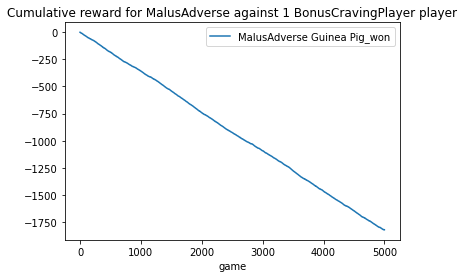

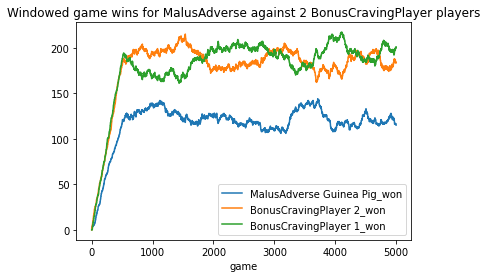

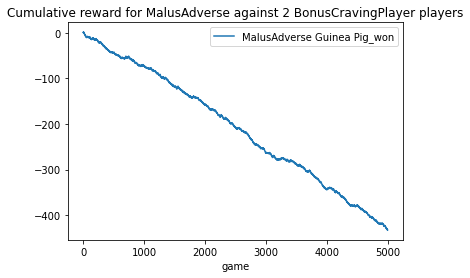

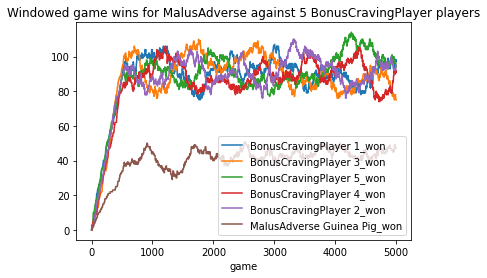

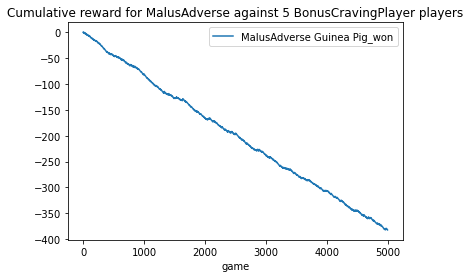

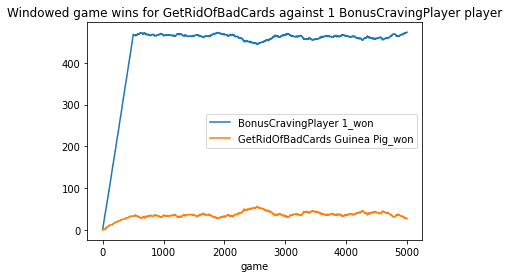

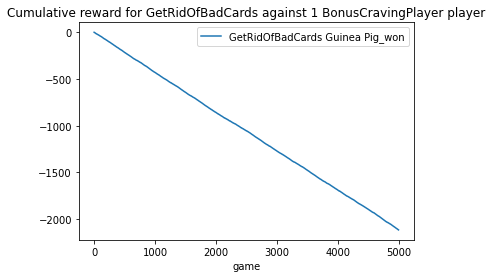

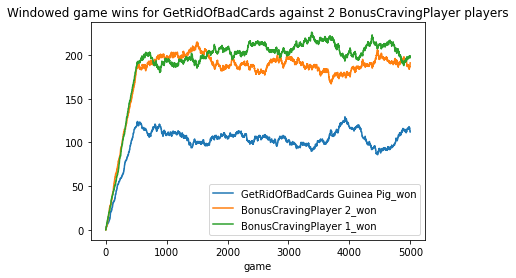

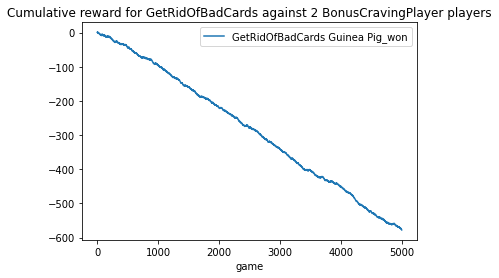

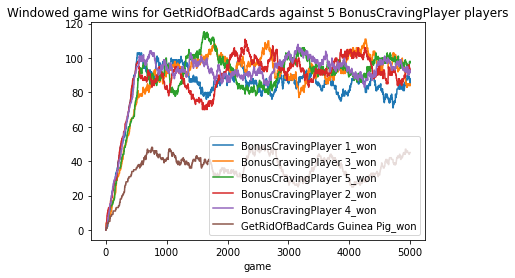

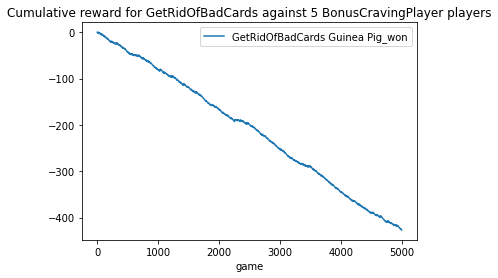

In [ ]:
for player_class in list_player_class:
    experiment_solo_show(player_class, opponent_class=BonusCravingPlayer)

## Experiment 4: Playing against MinPlayer

In [ ]:
for player_class in list_player_class:
    experiment_solo(player_class, opponent_class=MinPlayer)

100%|██████████| 5000/5000 [00:01<00:00, 3325.83it/s]


Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 4825
Sum of rewards: 0.0
/work/StupideVautour/implementation/analyse.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["game_winner"] = df_clean["game_winner"].apply(lambda x: x[0])
Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 5000
Sum of rewards: 0.0
Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 5000
Sum of rewards: 0.0
Number of games: 5000
Number of games in df_game: 5000
Number of games with a unique winner: 4820
Sum of rewards: 0.0
/work/StupideVautour/implementation/analyse.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy o

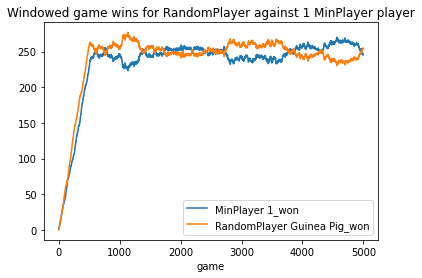

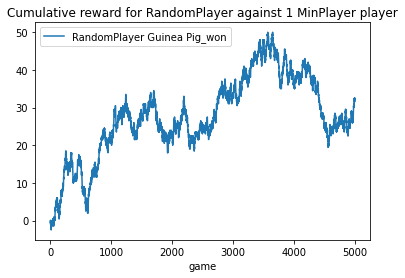

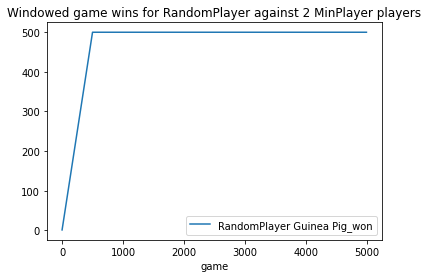

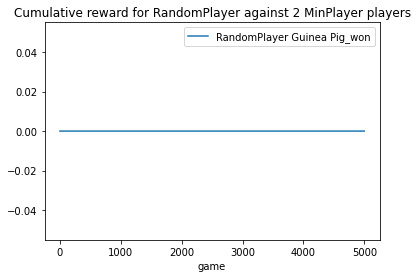

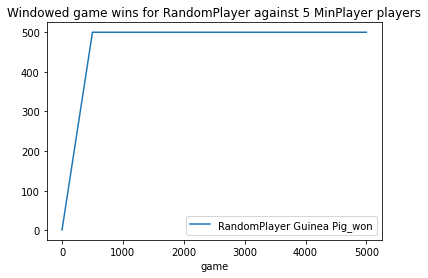

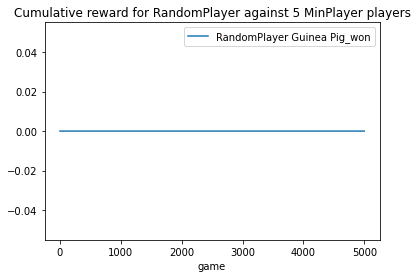

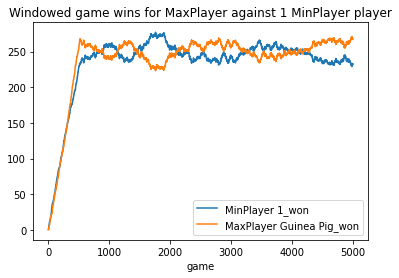

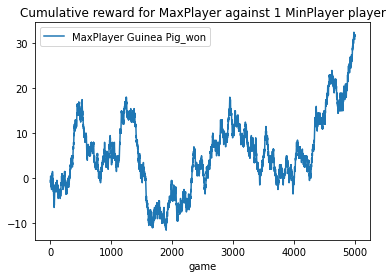

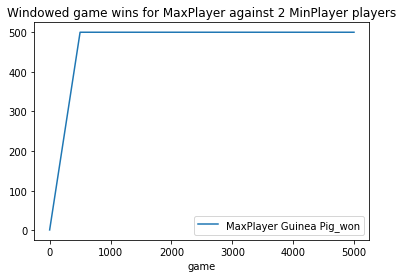

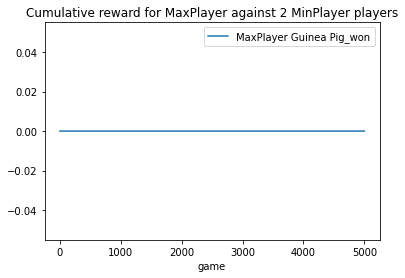

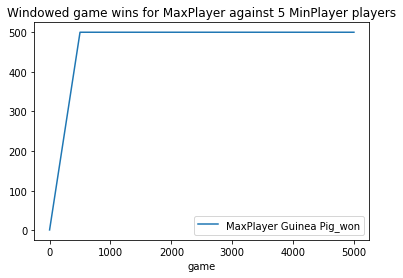

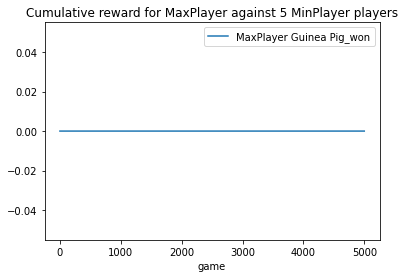

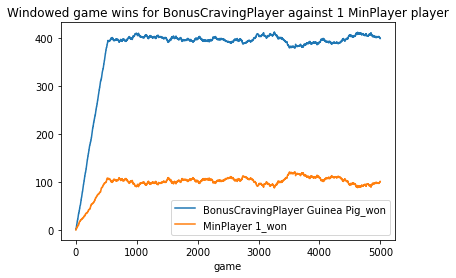

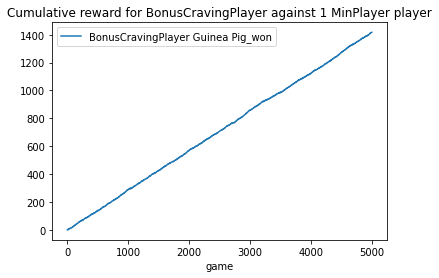

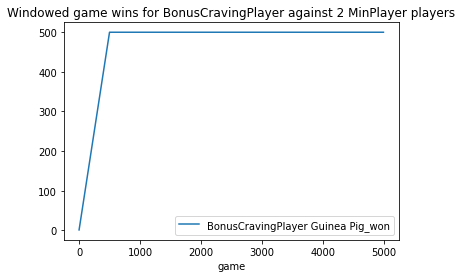

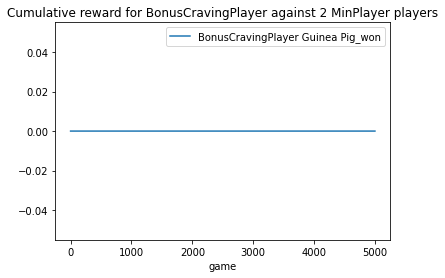

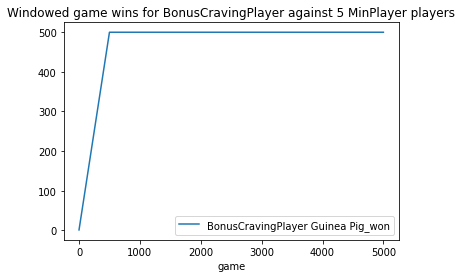

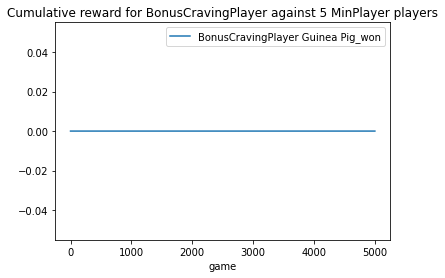

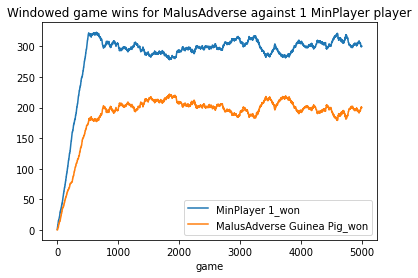

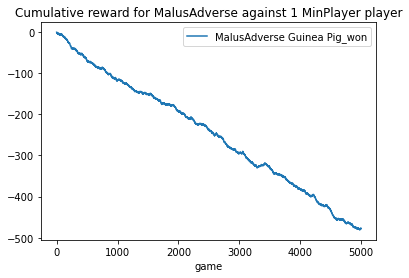

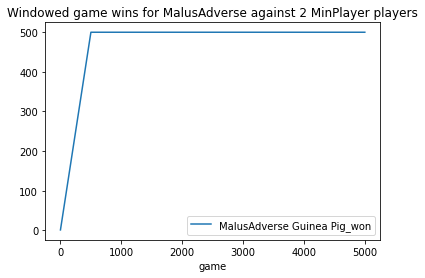

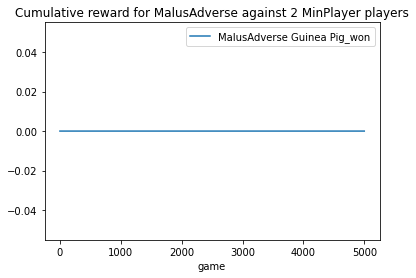

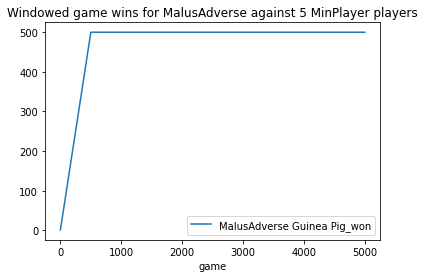

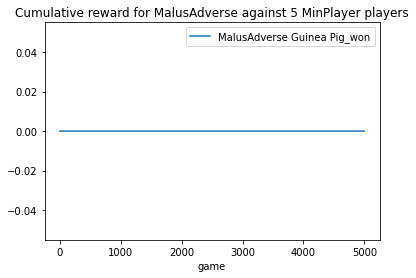

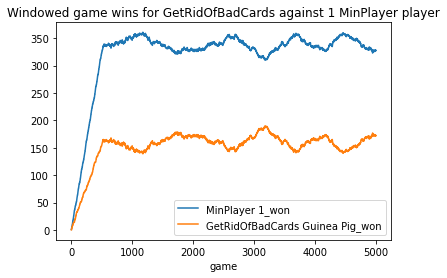

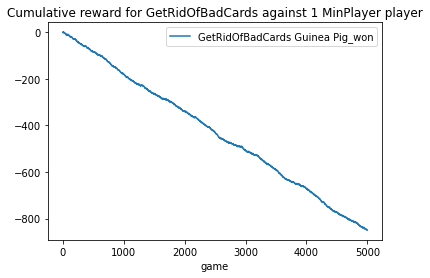

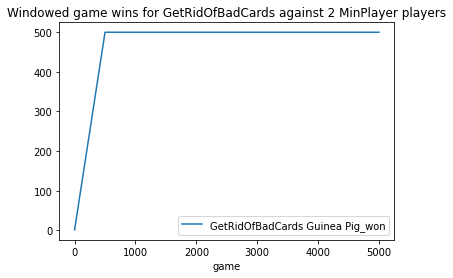

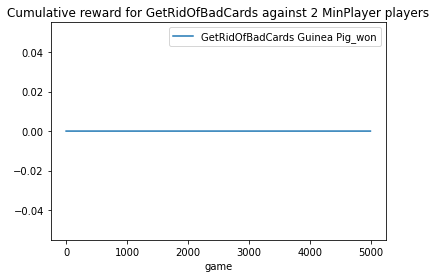

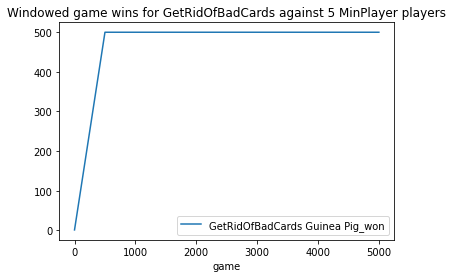

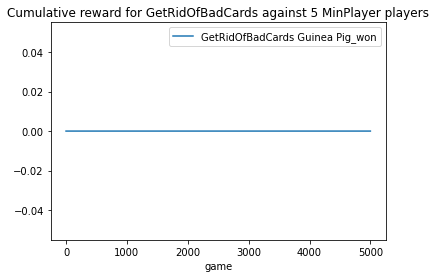

In [ ]:
for player_class in list_player_class:
    if player_class != MinPlayer:
        experiment_solo_show(player_class, opponent_class=MinPlayer)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3570100-157e-4a3f-b5c9-ebc0870008b3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>